In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
from sklearn.preprocessing import StandardScaler

### Data Exploration 



In [78]:
df_country = pd.read_csv("https://raw.githubusercontent.com/zeitgeist-hash/CE888/main/Lab_6/Data/Country-data.csv")
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [79]:
df_country.shape

(167, 10)

In [80]:
df_dict = pd.read_csv("https://raw.githubusercontent.com/zeitgeist-hash/CE888/main/Lab_6/Data/data-dictionary.csv")
df_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


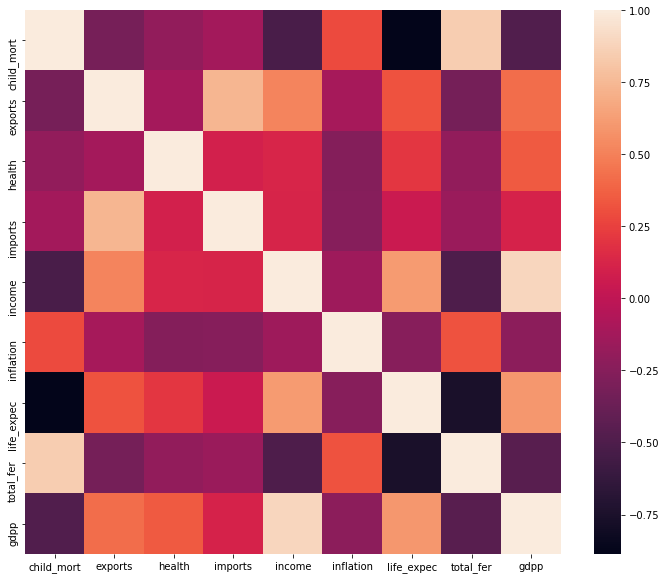

In [81]:
#Plot correlation matrix of indicators
plt.figure(figsize=(12,10))
corrMatrix = df_country.corr()
sns.heatmap(corrMatrix)

### K-Means Clustering

In [82]:
from sklearn.cluster import KMeans

In [83]:
X = df_country.iloc[:,1:10]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [84]:
# Split data into 3 clusters
km = KMeans(n_clusters=3).fit(X_std)
km.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [85]:
df_country['Category'] = km.labels_
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Category
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


In [104]:
for i in range(3):
    print("Cluster:", i)
    print("The Members:", ' | '.join(list(df_country[df_country['Category'] == i]['country'].values)))
    print("Total Members:", len(list(df_country[df_country['Category'] == i]['country'].values)))
    print()

Cluster: 0
The Members: Albania | Algeria | Antigua and Barbuda | Argentina | Armenia | Azerbaijan | Bahamas | Bangladesh | Barbados | Belarus | Belize | Bhutan | Bolivia | Bosnia and Herzegovina | Brazil | Bulgaria | Cambodia | Cape Verde | Chile | China | Colombia | Costa Rica | Croatia | Dominican Republic | Ecuador | Egypt | El Salvador | Estonia | Fiji | Georgia | Grenada | Guatemala | Guyana | Hungary | India | Indonesia | Iran | Jamaica | Jordan | Kazakhstan | Kyrgyz Republic | Latvia | Lebanon | Libya | Lithuania | Macedonia, FYR | Malaysia | Maldives | Mauritius | Micronesia, Fed. Sts. | Moldova | Mongolia | Montenegro | Morocco | Myanmar | Nepal | Oman | Panama | Paraguay | Peru | Philippines | Poland | Romania | Russia | Samoa | Saudi Arabia | Serbia | Seychelles | Solomon Islands | Sri Lanka | St. Vincent and the Grenadines | Suriname | Tajikistan | Thailand | Tonga | Tunisia | Turkey | Turkmenistan | Ukraine | Uruguay | Uzbekistan | Vanuatu | Venezuela | Vietnam
Total Memb

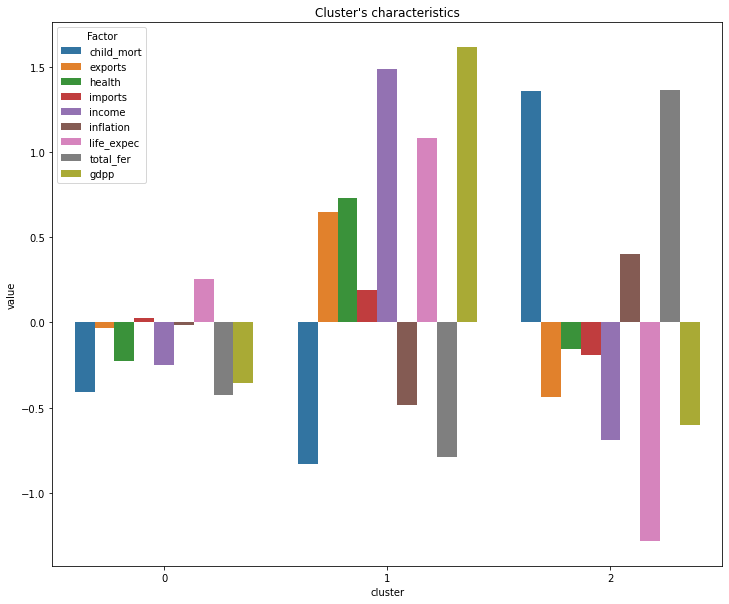

In [138]:
visualize = pd.DataFrame(km.cluster_centers_)
visualize = visualize.T
visualize['Factor'] = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
visualize = visualize.melt(id_vars=['Factor'], var_name='cluster')
visualize['cluster'] = visualize.cluster.astype('category')
plt.figure(figsize=(12, 10))
sns.barplot(data=visualize, x='cluster', y='value', hue='Factor')
plt.title('Cluster\'s characteristics')
plt.show()

### Conclusion

Cluster 0: developing country. Compared to data from Cluster 1 and Cluster 2, countries in Cluster 0 are relatively evenly distributed across all data.


Cluster 1: developed country. Compared to data from Cluster 0 and Cluster 2, countries in Cluster 1 have relatively high average exports, health, income, life_expec and gdpp data, while average child_mort, inflation and total_fer are relatively low.


Cluster 2: under-developing country. The situation is the opposite of Cluster 1.